## 範例重點
* 了解如何 reset Tensorflow Graph
* 學習如何以迴圈方式訓練不同超參數的模型
* 學習如何以迴圈方式繪圖

In [8]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [9]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [10]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [11]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [ ]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use

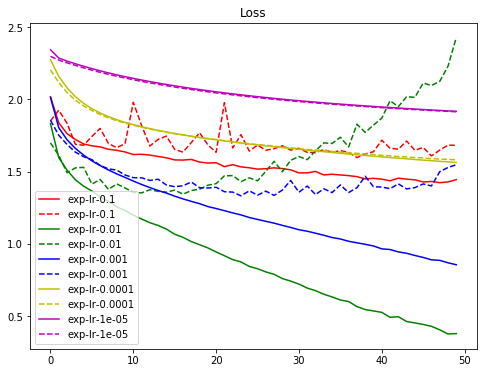

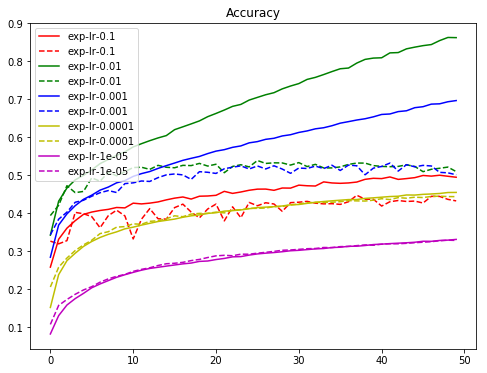

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [13]:
## 超參數設定
LEARNING_RATE = 1e-1
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.99, 0.95, 0.5, 0.1, 0.01]
nesterov_flag = [True , False]

In [15]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for mom in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.6f" % (mom))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=mom)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-mom-%s" % str(mom)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.990000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 176us/step - loss: 2.0535 - acc: 0.2394 - val_loss: 2.0070 - val_acc: 0.2724
Epoch 2/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.8020 - acc: 0.3427 - val_loss: 2.0228 - val_acc: 0.2893
Epoch 3/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.7751 - acc: 0.3612 - val_loss: 1.8523 - val_acc: 0.3494
Epoch 4/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.7351 - acc: 0.3746 - val_loss: 1.7455 - val_acc: 0.3764
Epoch 5/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.7117 - acc: 0.3854 - val_loss: 1.7208 - val_acc: 0.3857
Epoch 6/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.6742 - acc: 0.4002 - val_loss: 1.8710 - val_acc: 0.3403
Epoch 7/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.6696 - acc: 0.4026 - val_loss: 1.7941 - 

50000/50000 [==============================] - 10s 192us/step - loss: 2.0711 - acc: 0.2420 - val_loss: 2.0313 - val_acc: 0.2577
Epoch 2/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.8426 - acc: 0.3370 - val_loss: 1.7803 - val_acc: 0.3555
Epoch 3/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.7436 - acc: 0.3745 - val_loss: 1.7828 - val_acc: 0.3650
Epoch 4/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.6775 - acc: 0.4006 - val_loss: 1.6796 - val_acc: 0.3945
Epoch 5/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.6261 - acc: 0.4203 - val_loss: 1.6820 - val_acc: 0.3814
Epoch 6/50
50000/50000 [==============================] - 10s 208us/step - loss: 1.5770 - acc: 0.4355 - val_loss: 1.6976 - val_acc: 0.3907
Epoch 7/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.5525 - acc: 0.4455 - val_loss: 1.6505 - val_acc: 0.4027
Epoch 8/50
50000/50000 [==================

Epoch 2/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.8346 - acc: 0.3405 - val_loss: 1.8957 - val_acc: 0.3106
Epoch 3/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.7409 - acc: 0.3793 - val_loss: 1.8062 - val_acc: 0.3423
Epoch 4/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.6741 - acc: 0.4049 - val_loss: 1.6971 - val_acc: 0.4013
Epoch 5/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.6270 - acc: 0.4197 - val_loss: 1.6940 - val_acc: 0.3753
Epoch 6/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.5861 - acc: 0.4357 - val_loss: 1.6123 - val_acc: 0.4237
Epoch 7/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.5407 - acc: 0.4494 - val_loss: 1.6048 - val_acc: 0.4191
Epoch 8/50
50000/50000 [==============================] - 9s 186us/step - loss: 1.5219 - acc: 0.4577 - val_loss: 1.5646 - val_acc: 0.4394
Epoch 9/50
50000/50000 [=========

50000/50000 [==============================] - 9s 183us/step - loss: 1.7408 - acc: 0.3760 - val_loss: 1.7735 - val_acc: 0.3478
Epoch 4/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.6727 - acc: 0.4055 - val_loss: 1.7283 - val_acc: 0.3732
Epoch 5/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.6249 - acc: 0.4187 - val_loss: 1.6463 - val_acc: 0.4147
Epoch 6/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.5830 - acc: 0.4361 - val_loss: 1.5847 - val_acc: 0.4301
Epoch 7/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.5511 - acc: 0.4479 - val_loss: 1.8418 - val_acc: 0.3638
Epoch 8/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.5185 - acc: 0.4600 - val_loss: 1.5848 - val_acc: 0.4372
Epoch 9/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.4929 - acc: 0.4692 - val_loss: 1.5762 - val_acc: 0.4367
Epoch 10/50
50000/50000 [===================

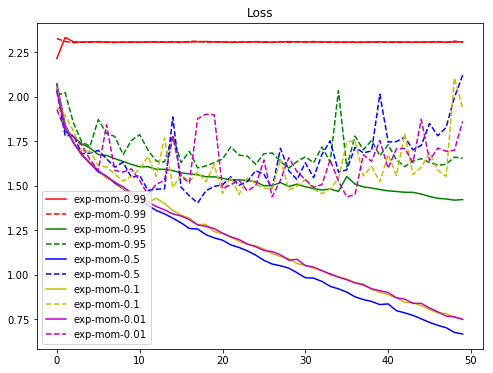

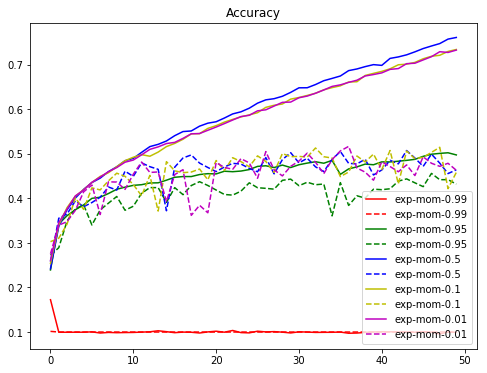

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [18]:
results2 = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for mom in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.6f" % (mom))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=False, momentum=mom)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-mom-%s" % str(mom)
    results2[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.990000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 222us/step - loss: 2.0482 - acc: 0.2378 - val_loss: 1.9790 - val_acc: 0.2615
Epoch 2/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.9238 - acc: 0.2914 - val_loss: 1.9110 - val_acc: 0.3140
Epoch 3/50
50000/50000 [==============================] - 10s 210us/step - loss: 1.8942 - acc: 0.3087 - val_loss: 1.8541 - val_acc: 0.3239
Epoch 4/50
50000/50000 [==============================] - 11s 210us/step - loss: 1.8831 - acc: 0.3123 - val_loss: 1.8587 - val_acc: 0.3292
Epoch 5/50
50000/50000 [==============================] - 11s 210us/step - loss: 1.9011 - acc: 0.3010 - val_loss: 1.8870 - val_acc: 0.3115
Epoch 6/50
50000/50000 [==============================] - 10s 210us/step - loss: 1.9310 - acc: 0.2796 - val_loss: 1.9720 - val_acc: 0.2378
Epoch 7/50
50000/50000 [==============================] - 10s 210us/step - loss: 1.9610 - acc: 0.2522 - val_loss: 1.

50000/50000 [==============================] - 12s 237us/step - loss: 2.0112 - acc: 0.2650 - val_loss: 1.8998 - val_acc: 0.3256
Epoch 2/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.7701 - acc: 0.3655 - val_loss: 1.9823 - val_acc: 0.3384
Epoch 3/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.6860 - acc: 0.3974 - val_loss: 1.6566 - val_acc: 0.3900
Epoch 4/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.6165 - acc: 0.4226 - val_loss: 1.6046 - val_acc: 0.4241
Epoch 5/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.5673 - acc: 0.4425 - val_loss: 1.6416 - val_acc: 0.4149
Epoch 6/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.5156 - acc: 0.4600 - val_loss: 1.5723 - val_acc: 0.4244
Epoch 7/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.4799 - acc: 0.4714 - val_loss: 1.5070 - val_acc: 0.4552
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.8241 - acc: 0.3436 - val_loss: 1.7750 - val_acc: 0.3665
Epoch 3/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.7357 - acc: 0.3803 - val_loss: 1.7099 - val_acc: 0.3840
Epoch 4/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.6804 - acc: 0.3996 - val_loss: 1.7168 - val_acc: 0.3870
Epoch 5/50
50000/50000 [==============================] - 11s 219us/step - loss: 1.6189 - acc: 0.4232 - val_loss: 1.7036 - val_acc: 0.3862
Epoch 6/50
50000/50000 [==============================] - 11s 218us/step - loss: 1.5843 - acc: 0.4380 - val_loss: 1.7048 - val_acc: 0.3913
Epoch 7/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.5372 - acc: 0.4513 - val_loss: 1.5479 - val_acc: 0.4467
Epoch 8/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.5066 - acc: 0.4620 - val_loss: 1.7934 - val_acc: 0.3678
Epoch 9/50
50000/50000 [===

Epoch 3/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.7500 - acc: 0.3748 - val_loss: 1.9072 - val_acc: 0.3053
Epoch 4/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.6689 - acc: 0.4056 - val_loss: 1.8032 - val_acc: 0.3510
Epoch 5/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.6253 - acc: 0.4216 - val_loss: 1.6290 - val_acc: 0.4241
Epoch 6/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.5815 - acc: 0.4357 - val_loss: 1.6647 - val_acc: 0.3995
Epoch 7/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.5445 - acc: 0.4499 - val_loss: 1.5686 - val_acc: 0.4398
Epoch 8/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.5200 - acc: 0.4572 - val_loss: 1.6373 - val_acc: 0.4220
Epoch 9/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.4836 - acc: 0.4704 - val_loss: 1.5717 - val_acc: 0.4304
Epoch 10/50
50000/50000 [==

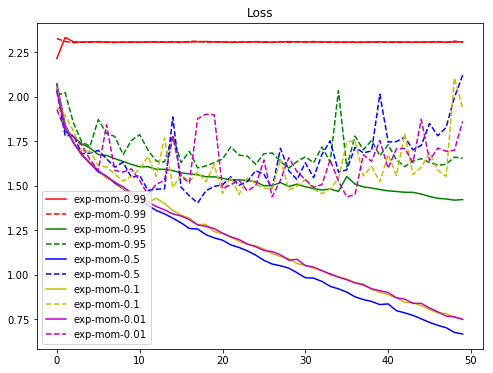

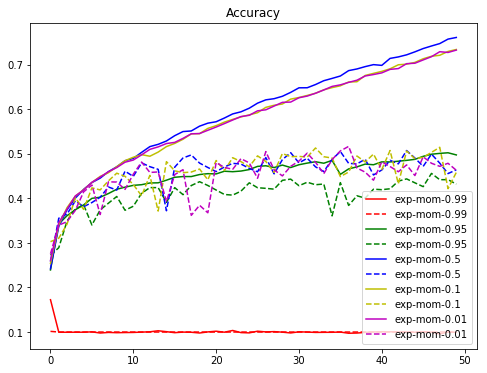

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results2[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results2[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results2[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results2[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()